In [1]:
!pip install prophet --quiet

In [2]:
!pip install yfinance --quiet

     |████████████████████████████████| 62 kB 1.3 MB/s 


In [3]:
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import warnings

from prophet import Prophet

warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

In [4]:
# Download BTC data using yfinance
df = yf.download('BTC-USD', start='2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...
2022-07-31,23652.070312,24121.642578,23275.703125,23336.896484,23336.896484,23553591896
2022-08-01,23336.718750,23464.787109,22890.796875,23314.199219,23314.199219,25849159141
2022-08-02,23308.433594,23415.041016,22710.083984,22978.117188,22978.117188,28389250717


In [6]:
# Reset index which is required by fbprophet
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...,...
2037,2022-07-31,23652.070312,24121.642578,23275.703125,23336.896484,23336.896484,23553591896
2038,2022-08-01,23336.718750,23464.787109,22890.796875,23314.199219,23314.199219,25849159141
2039,2022-08-02,23308.433594,23415.041016,22710.083984,22978.117188,22978.117188,28389250717
2040,2022-08-03,22981.302734,23578.650391,22747.835938,22846.507812,22846.507812,26288169966


In [7]:
df[['ds','y']] = df[['Date','Adj Close']]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,2017-01-01,998.325012
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2017-01-02,1021.750000
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2017-01-03,1043.839966
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,2017-01-04,1154.729980
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,2017-01-05,1013.380005


In [8]:
# Create instance of Prophet class
model = Prophet()

In [9]:
# Fit the model variable to the dataframe - takes ds and y cols as parameters
model.fit(df)

12:13:13 - cmdstanpy - INFO - Chain [1] start processing
12:13:14 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Make the future dataframe
future = model.make_future_dataframe(365)

In [11]:
forecast = model.predict(future)

In [12]:
# Predicted BTC price is in yhat column
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,-642.550400,-4215.201939,7446.772914,-642.550400,-642.550400,2614.330190,2614.330190,2614.330190,-1.896008,-1.896008,-1.896008,2616.226198,2616.226198,2616.226198,0.0,0.0,0.0,1971.779790
1,2017-01-02,-616.786881,-4258.989103,7799.700605,-616.786881,-616.786881,2662.713653,2662.713653,2662.713653,11.088794,11.088794,11.088794,2651.624859,2651.624859,2651.624859,0.0,0.0,0.0,2045.926772
2,2017-01-03,-591.023361,-3366.957408,8066.743683,-591.023361,-591.023361,2654.379399,2654.379399,2654.379399,-11.898276,-11.898276,-11.898276,2666.277675,2666.277675,2666.277675,0.0,0.0,0.0,2063.356037
3,2017-01-04,-565.259842,-3994.397411,8219.030853,-565.259842,-565.259842,2690.953736,2690.953736,2690.953736,32.063652,32.063652,32.063652,2658.890084,2658.890084,2658.890084,0.0,0.0,0.0,2125.693894
4,2017-01-05,-539.496322,-3855.894176,7805.460090,-539.496322,-539.496322,2587.987517,2587.987517,2587.987517,-40.614488,-40.614488,-40.614488,2628.602005,2628.602005,2628.602005,0.0,0.0,0.0,2048.491195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,2023-07-31,16162.029844,-5802.711425,32833.160814,-1574.927606,34464.158464,-2876.447549,-2876.447549,-2876.447549,11.088794,11.088794,11.088794,-2887.536343,-2887.536343,-2887.536343,0.0,0.0,0.0,13285.582295
2403,2023-08-01,16118.042198,-5228.865219,32144.525921,-1708.235453,34492.212680,-2703.913498,-2703.913498,-2703.913498,-11.898276,-11.898276,-11.898276,-2692.015222,-2692.015222,-2692.015222,0.0,0.0,0.0,13414.128700
2404,2023-08-02,16074.054552,-4454.316205,33742.493250,-1841.543299,34520.266895,-2460.566885,-2460.566885,-2460.566885,32.063652,32.063652,32.063652,-2492.630537,-2492.630537,-2492.630537,0.0,0.0,0.0,13613.487666
2405,2023-08-03,16030.066905,-5003.691448,32587.674786,-1974.851146,34548.321111,-2330.952919,-2330.952919,-2330.952919,-40.614488,-40.614488,-40.614488,-2290.338431,-2290.338431,-2290.338431,0.0,0.0,0.0,13699.113986


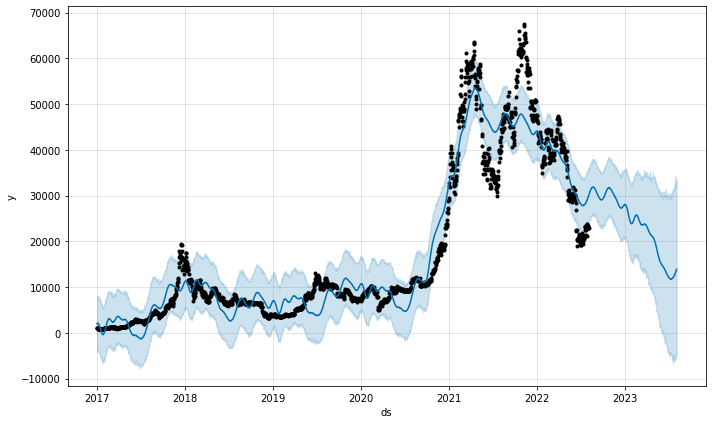

In [13]:
model.plot(forecast)
plt.show()

### Show seasonality components
---

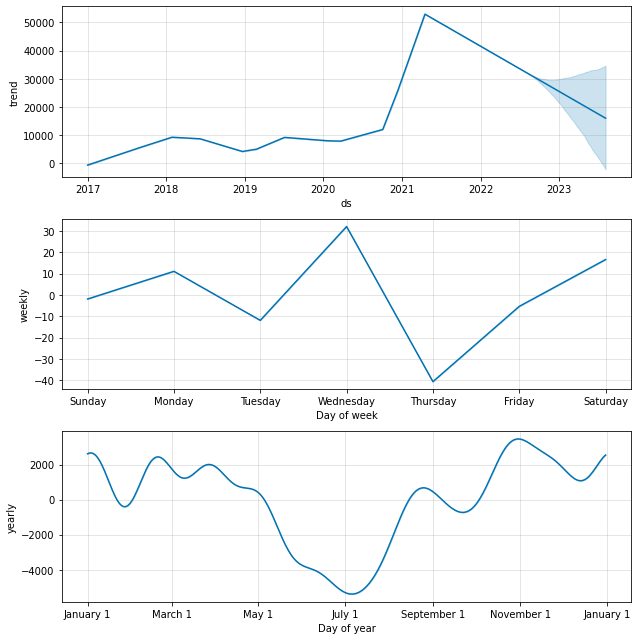

In [14]:
# Trend, weekly and yearly seasonality
model.plot_components(forecast)
plt.show()

### Let's create a function to wrap this up
---

[*********************100%***********************]  1 of 1 completed

12:13:20 - cmdstanpy - INFO - Chain [1] start processing


12:13:20 - cmdstanpy - INFO - Chain [1] done processing


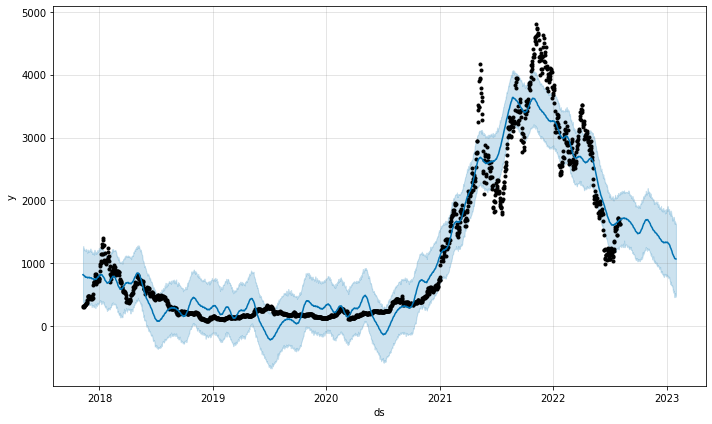

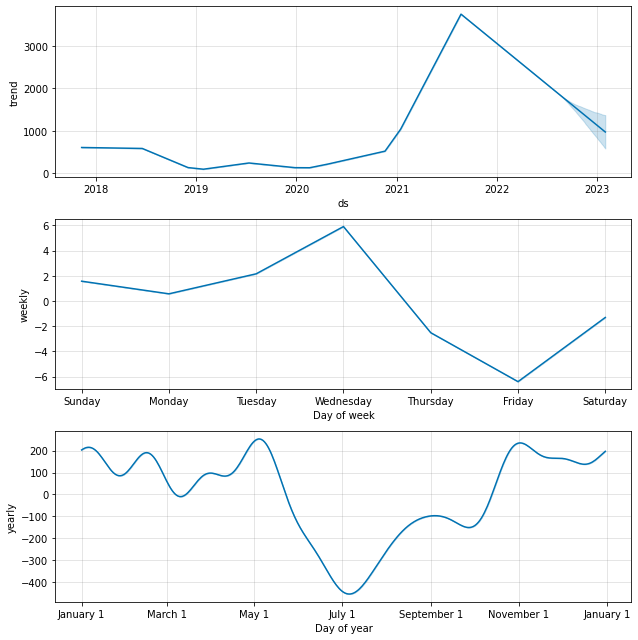

In [15]:
def price_forecast_yfinance(ticker, years_back=5, days_forecast=180):
    # Set start and end dates
    end_date = dt.datetime.now()
    # Subtract number of years back
    start_date = dt.datetime(end_date.year - years_back, end_date.month, end_date.day)
    
    # Download BTC data using yfinance
    df = yf.download(ticker, start=start_date, end=end_date)
    # Reset index for fbprophet
    df.reset_index(inplace=True)
    # Create parameters for Prophet
    df[['ds','y']] = df[['Date','Adj Close']]
    # print(df)
    # Create instance of Prophet class
    model = Prophet()
    # Fit the model variable to the dataframe - takes ds and y cols as parameters
    model.fit(df)
    # Make the future dataframe
    future = model.make_future_dataframe(days_forecast)
    # Create forecast dataframe
    forecast = model.predict(future)
    # Plot forecasts, Trend, weekly and yearly seasonality
    model.plot(forecast), model.plot_components(forecast)


price_forecast_yfinance('ETH-USD')